In [ ]:
#LAB #3 - ML EXAMPLES WITH IRIS DATABASE
# from GitHub : venky14/Machine-Learning-with-Iris-Dataset

In [ ]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
iris = pd.read_csv('/home/paulo/Learning/in/Iris.csv')
iris.head()

In [ ]:
iris.info()

In [ ]:
#removing unneeded column
iris.drop("Id", axis=1, inplace = True)

In [ ]:
iris.head()

In [ ]:
# Some EDA
# Scatter Plot : t is an X-Y diagram that shows a relationship between two variables. 
#It is used to plot data points on a vertical and a horizontal axis. 
# The purpose is to show how much one variable affects another.
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

In [ ]:

sns.FacetGrid(iris, hue='Species', size=5)\
   .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')\
   .add_legend()

In [ ]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

In [ ]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=iris)

In [ ]:

Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.
Classification: Samples belong to two or more classes and we want to learn from already labeled data how to 
predict the class of unlabeled data
Regression: If the desired output consists of one or more continuous variables, then the task is called regression. 
An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.
Before we start, we need to clear some ML notations.
attributes-->An attribute is a property of an instance that may be used to determine its classification. 
In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.
Target variable, in the machine learning context is the variable that is or should be the output. 
Here the target variables are the 3 flower species.


In [ ]:


# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.cross_validation import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

In [ ]:
# draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.figure(figsize=(8,4))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r') 
plt.show()

In [ ]:
Observation---> The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated 
We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm 
as we are using only 2 features that are not correlated. 
Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

In [ ]:
Steps To Be followed When Applying an Algorithm

Split the dataset into training and testing dataset. 
The testing dataset is generally smaller than training one as it will help in training the model better.

Select any algorithm based on the problem (classification or regression) whatever you feel may be good. 
Then pass the training dataset to the algorithm to train it. We use the .fit() method 
Then pass the testing data to the trained algorithm to predict the outcome. 
We use the .predict() method. We then check the accuracy by passing the predicted outcome
and the actual output to the model.

In [ ]:
#Splitting The Data into Training And Testing Dataset
train, test = train_test_split(iris, test_size=0.3) 
# our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

In [ ]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train.Species # output of the training data

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data feature
test_y = test.Species # output value of the test data

In [ ]:
train_X.head()

In [ ]:
test_X.head()

In [ ]:
train_y.head()

In [ ]:
# SVM ALGORITHM
model = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) 
#we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output


In [ ]:
# Logistic Regression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

In [ ]:
#Decision Tree
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))
# other way
model.score(test_X , test_y)

In [ ]:
# K-Nearest Neighbors
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

In [ ]:
#Let's check the accuracy for various values of n for K-Nearest nerighbours
a_index = list(range(1,11))
a = pd.Series()
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)

In [ ]:
# We used all the features of iris in above models. Now we will use Petals and Sepals Seperately
# Creating Petals And Sepals Training Data
petal = iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm','Species']]

In [ ]:

#For Iris Petal

train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0) #petals
train_x_p = train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p = train_p.Species

test_x_p = test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p = test_p.Species

In [ ]:

#For Iris Sepal

train_s,test_s = train_test_split(sepal, test_size=0.3, random_state=0) #sepals
train_x_s = train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s = train_s.Species

test_x_s = test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s = test_s.Species


In [ ]:
#SVM Algorithm
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

In [ ]:
#Logistic Regression
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

In [ ]:
#Decision Tree

model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

In [ ]:
#K-Nearest Neighbors
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))


In [ ]:

Observations:

    Using Petals over Sepal for training the data gives a much better accuracy.
    This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length 
    as very low whereas the correlation between Petal Width and Length was very high.



(array([  5.,   6.,  33.,   0.,  79., 214.,   0., 322., 256.,  85.]),
 array([0.81578947, 0.83421053, 0.85263158, 0.87105263, 0.88947368,
        0.90789474, 0.92631579, 0.94473684, 0.96315789, 0.98157895,
        1.        ]),
 <a list of 10 Patch objects>)

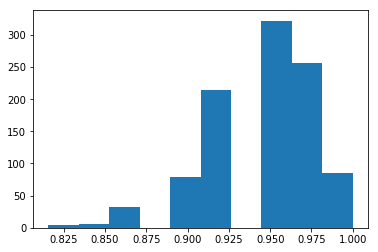

In [50]:
# Part II - Refine model
#However, there's a catch: Depending on how our training and testing set was sampled, 
#our model can achieve anywhere from 80% to 100% accuracy:

# *** First : to get numeric values from iris db 
all_inputs = iris[['SepalLengthCm', 'SepalWidthCm',
                             'PetalLengthCm', 'PetalWidthCm']].values 

all_labels = iris['Species'].values

model_accuracies = []

for repetition in range(1000):
    (train_X ,
     test_X,
     train_Y,
     test_Y ) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(train_X,  train_Y )
    classifier_accuracy = decision_tree_classifier.score(test_X, test_Y)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)


In [ ]:

It's obviously a problem that our model performs quite differently depending on the subset of the data it's trained on. 
This phenomenon is known as overfitting:
The model is learning to classify the training set so well that it doesn't generalize and perform well on data 
it hasn't seen before.



In [ ]:
# Cross-validation
This problem is the main reason that most data scientists perform k-fold cross-validation on their models: 
Split the original data set into k subsets, use one of the subsets as the testing set, and the rest of the 
subsets are used as the training set. 
This process is then repeated k times such that each subset is used as the testing set exactly once.

10-fold cross-validation is the most common choice, so let's use that here.

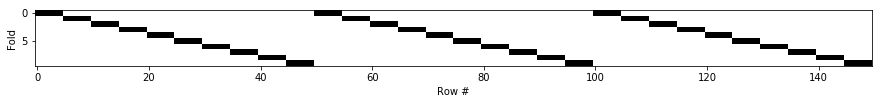

In [51]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

Text(0.5,1,'Average score: 0.9533333333333334')

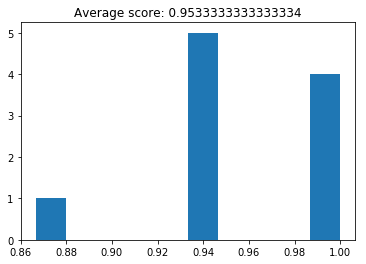

In [52]:
# We can perform 10-fold cross-validation on our model with the following code:



from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

''

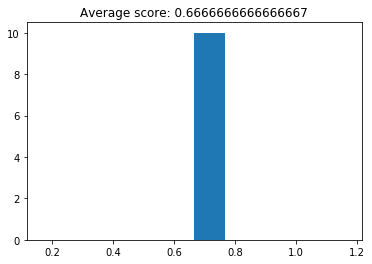

In [53]:
#Now we have a much more consistent rating of our classifier's general classification accuracy.

# Parameter tuning 
# For example, if we severely limit the depth of our decision tree classifier:

decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;



In [ ]:
#Therefore, we need to find a systematic method to discover the best parameters for our model and data set.

# The most common method for model parameter tuning is Grid Search.
# The idea behind Grid Search is simple: explore a range of parameters and find the best-performing parameter combination
# We'll stick to only two parameters for now, but it's possible to simultaneously explore dozens of parameters if we want.

In [54]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9666666666666667
Best parameters: {'max_depth': 3, 'max_features': 2}


''

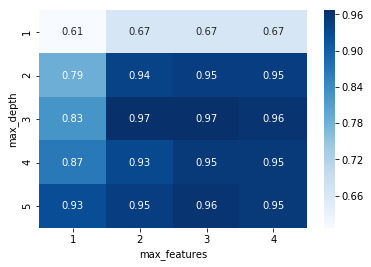

In [56]:
# Now let's visualize the grid search to see how the parameters interact.
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sns.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
;

In [57]:
#Let's go ahead and use a broad grid search to find the best settings for a handful of parameters.
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.96
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'splitter': 'best'}


In [58]:
#Now we can take the best classifier from the Grid Search and use that:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

#We can even visualize the decision tree with GraphViz to see how it's making the classifications:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)
    # file in donwload directory

''

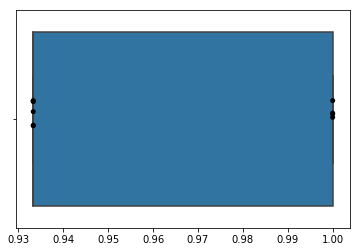

In [62]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)

sns.boxplot(dt_scores)
sns.stripplot(dt_scores, jitter=True, color='black')
;


In [ ]:
#Random Forest classifiers work around that limitation by creating a whole bunch of decision trees (hence "forest")
#— each trained on random subsets of training samples (drawn with replacement) and features (drawn without replacement)
#— and have the decision trees work together to make a more accurate classification.

In [63]:

from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_



Best score: 0.9666666666666667
Best parameters: {'criterion': 'gini', 'max_features': 2, 'n_estimators': 25}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

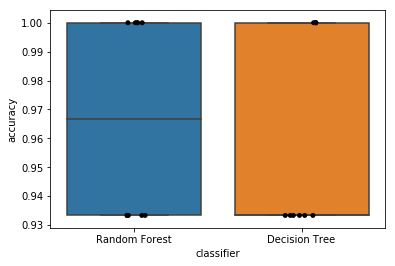

In [64]:
# Compare methods performance


random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sns.boxplot(x='classifier', y='accuracy', data=both_df)
sns.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black')

In [ ]:
# How about that? They both seem to perform about the same on this data set. 
# This is probably because of the limitations of our data set: We have only 4 features to make the classification, 
# and Random Forest classifiers excel when there's hundreds of possible features to look at. 
# In other words, there wasn't much room for improvement with this data set.

THIS IS A TEST FOR MAKDOWN TEXT COMMENT OR TITLE
XXXXXXXXXXXXX
YYYYYYYYYYYYYYY